In [8]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten,
                                     Dense, Dropout, GlobalAveragePooling2D, BatchNormalization, Flatten)
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess_input


from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import (classification_report, confusion_matrix,
                             f1_score, roc_curve, auc, precision_score, recall_score)
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_v2_preprocess_input


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split


import os
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import layers, callbacks

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

2024-12-20 11:57:14.745841: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-20 11:57:15.291954: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-20 11:57:13.852462: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/abdo/miniconda3/envs/tf/lib/
2024-12-20 11:57:13.853295: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.

Found 70491 files belonging to 141 classes.
Using 56393 files for training.


2024-12-20 11:58:00.341504: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-20 11:58:00.386187: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-20 11:58:00.386318: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-20 11:58:00.389404: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Found 70491 files belonging to 141 classes.
Using 14098 files for validation.
Class Names: ['Apple 6', 'Apple Braeburn 1', 'Apple Crimson Snow 1', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith 1', 'Apple Pink Lady 1', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious 1', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apple hit 1', 'Apricot 1', 'Avocado 1', 'Avocado ripe 1', 'Banana 1', 'Banana Lady Finger 1', 'Banana Red 1', 'Beetroot 1', 'Blueberry 1', 'Cabbage white 1', 'Cactus fruit 1', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula 1', 'Carrot 1', 'Cauliflower 1', 'Cherry 1', 'Cherry 2', 'Cherry Rainier 1', 'Cherry Wax Black 1', 'Cherry Wax Red 1', 'Cherry Wax Yellow 1', 'Chestnut 1', 'Clementine 1', 'Cocos 1', 'Corn 1', 'Corn Husk 1', 'Cucumber 1', 'Cucumber 3', 'Cucumber Ripe 1', 'Cucumber Ripe 2', 'Dates 1', 'Eggplant 1', 'Eggplant long 1', 'Fig 1', 'Ginger Root 1', 'Granadilla 1', 'Grape Blue 1', 'Grape Pink 1', 'Grape White 1', 'Grape Whit

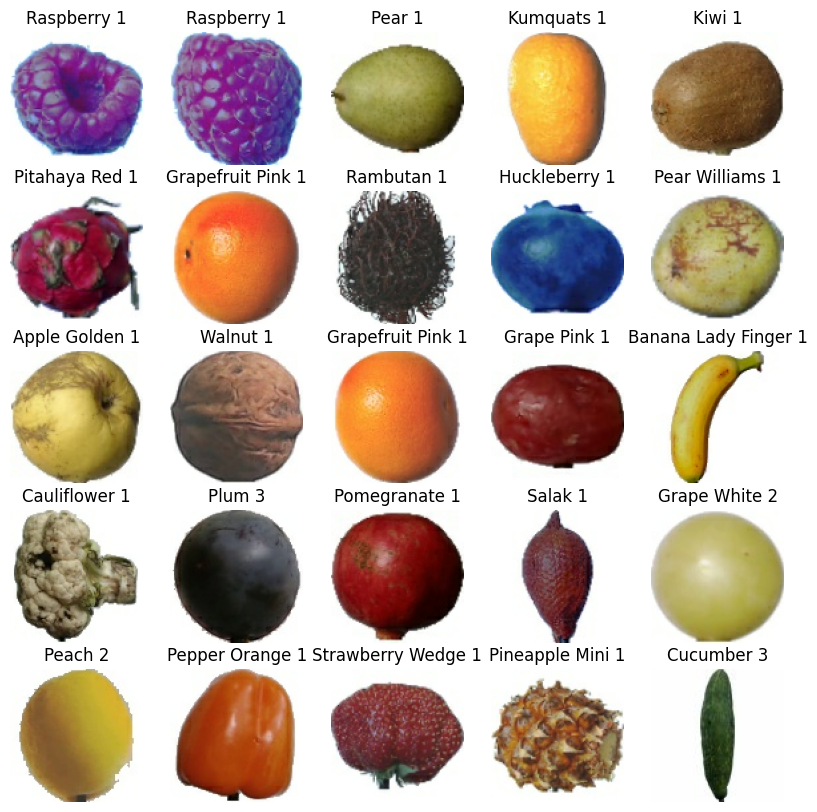

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1_conv[0][0]']      

In [9]:
# load dataset
train_dir = '../Data/raw/4/fruits-360_dataset_100x100/fruits-360/Training'
test_dir = '../Data/raw/4/fruits-360_dataset_100x100/fruits-360/Test'

# Load training dataset without preprocessing
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    batch_size=32,
    image_size=(100, 100),
    seed=123,
    shuffle=True,
)

# Load validation dataset without preprocessing
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='validation',
    batch_size=32,
    image_size=(100, 100),
    seed=42,
)


# Get the class names from the subdirectories in the training directory
class_names = sorted(os.listdir(train_dir))

# Print the class names and the number of classes
print("Class Names:", class_names)
num_classes = len(class_names)
print("Number of Classes:", num_classes)




# Function to display images from a dataset
def show_images(dataset, class_names):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):  # Take one batch from the dataset
        for i in range(25):  # Display 25 images
            ax = plt.subplot(5, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

# Show images from training dataset
show_images(train_ds, class_names)
plt.show()







# for faster training which takes less time and less memory for training
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)





# Augmentation for training dataset
data_augmentation = tf.keras.Sequential([
    # tf.keras.layers.RandomFlip('horizontal'),
    # tf.keras.layers.RandomRotation(0.2)
])







# Using resNET model of transfer learning for training 
base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(100, 100, 3))


preprocess_input = tf.keras.applications.resnet.preprocess_input
base_model.trainable = False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(num_classes)



inputs = tf.keras.Input(shape=(100, 100, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)



optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
# Let's take a look at the base model architecture
base_model.summary()

Epoch 1/5


2024-12-20 11:58:56.442899: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 583 of 1000
2024-12-20 11:59:03.325443: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.
2024-12-20 11:59:05.625995: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2024-12-20 11:59:08.368785: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-12-20 11:59:08.583718: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-12-20 11:59:08.583789: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2024-12-20 11:59:08.789830: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-12-20 11:59:08.790021: W tensorflow/stream_execu

1763/1763 [==============================] - 84s 33ms/step - loss: 1.0289 - accuracy: 0.7962 - val_loss: 0.1159 - val_accuracy: 0.9957
Epoch 2/5
1763/1763 [==============================] - 47s 27ms/step - loss: 0.1001 - accuracy: 0.9898 - val_loss: 0.0332 - val_accuracy: 0.9995
Epoch 3/5
1763/1763 [==============================] - 47s 27ms/step - loss: 0.0366 - accuracy: 0.9980 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 4/5
1763/1763 [==============================] - 50s 29ms/step - loss: 0.0172 - accuracy: 0.9993 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 5/5
1763/1763 [==============================] - 47s 27ms/step - loss: 0.0090 - accuracy: 0.9997 - val_loss: 0.0034 - val_accuracy: 1.0000


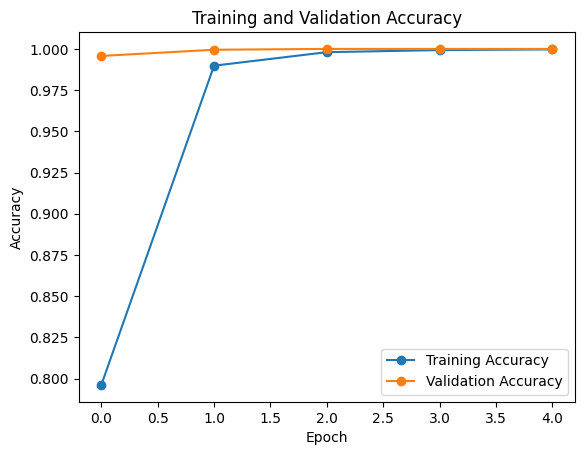

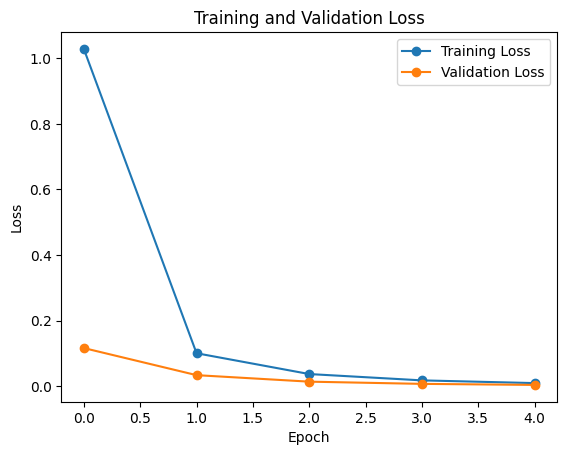

Evaluating Fast Model...
441/441 [==============================] - 11s 24ms/step - loss: 0.0034 - accuracy: 1.0000
Validation Accuracy: 100.00%
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
Classification Report:
                       precision    recall  f1-score   support

              Apple 6       1.00      1.00      1.00        96
     Apple Braeburn 1       1.00      1.00      1.00       118
 Apple Crimson Snow 1       1.00      1.00      1.00        88
       Apple Golden 1       1.00      1.00      1.00        97
       Apple Golden 2       1.00      1.00      1.00       106
       Apple Golden 3       1.00      1.00      1.00        99
 Apple Granny Smith 1       1.00      1.00      1.00       103
    Apple Pink Lady 1       1.00      1.00      1.00        88
          Apple Red 1       1.00      1.00      1.00        90
          Apple Red 2       1.00      1.00      1.00       103
          Apple Red 3       1.00      1.00      1.00        86
Apple Red Delicious 1    

In [10]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(patience=3)
checkpoint = ModelCheckpoint("model.h5", save_best_only=True)

MODEL_NAME = "fruits_resnet50"
OUTPUT_CONFUSION_MATRICES_DIR = os.path.join('../output/confusion_matrices/', MODEL_NAME)
os.makedirs(OUTPUT_CONFUSION_MATRICES_DIR, exist_ok=True)
OUTPUT_EVALUATION_METRICS_DIR = os.path.join('../output/evaluation_metrics/', MODEL_NAME)
os.makedirs(OUTPUT_EVALUATION_METRICS_DIR, exist_ok=True)


# Train the model with early stopping
history = model.fit(
    train_ds,
    epochs=5,
    validation_data=val_ds,
    callbacks=[early_stopping, checkpoint]
)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


# Plot training history
plt.plot(history.history['loss'], label='Training Loss',marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()




# Evaluate Fast Model
print("Evaluating Fast Model...")

# Get true labels and predictions
Y_true = []
Y_pred = []

for images, labels in val_ds:
    Y_true.extend(labels.numpy())
    predictions = model.predict(images)
    Y_pred.extend(np.argmax(predictions, axis=1))

Y_true = np.array(Y_true)
Y_pred = np.array(Y_pred)

# Calculate evaluation accuracy
evaluation_metrics = model.evaluate(val_ds, verbose=1)
evaluation_loss = evaluation_metrics[0]
evaluation_accuracy = evaluation_metrics[1]
print(f"Validation Accuracy: {evaluation_accuracy*100:.2f}%")

# Calculate F1 Score, Precision, Recall
f1 = f1_score(Y_true, Y_pred, average='weighted')
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Classification Report
target_names = class_names  # Use the class names obtained earlier
print("Classification Report:")
print(classification_report(Y_true, Y_pred, target_names=target_names))

# Confusion Matrix with Percentages
cm = confusion_matrix(Y_true, Y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
cm_percentage = np.nan_to_num(cm_percentage)

# Prepare annotations with percentage symbol
annot_labels = np.empty_like(cm_percentage).astype(str)
nrows, ncols = cm_percentage.shape
for i in range(nrows):
    for j in range(ncols):
        annot_labels[i, j] = f'{cm_percentage[i, j]:.2f}%'

plt.figure(figsize=(145, 120))
sns.heatmap(cm_percentage, annot=annot_labels, fmt='', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix (Percentage) - Fast Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# Save confusion matrix
confusion_matrix_path = os.path.join(OUTPUT_CONFUSION_MATRICES_DIR, 'confusion_matrix_percentage.png')
plt.savefig(confusion_matrix_path)
plt.show()

# Save evaluation metrics to CSV
metrics_data = {
    'Metric': ['Validation Accuracy', 'Validation Loss', 'F1 Score', 'Precision', 'Recall'],
    'Value': [evaluation_accuracy, evaluation_loss, f1, precision, recall]
}
metrics_df = pd.DataFrame(metrics_data)
metrics_csv_path = os.path.join(OUTPUT_EVALUATION_METRICS_DIR, 'metrics.csv')
metrics_df.to_csv(metrics_csv_path, index=False)

# Save the final model
model.save('../models/model_fruits_resnet50.h5')

Found 70491 files belonging to 141 classes.
Using 56393 files for training.
Found 70491 files belonging to 141 classes.
Using 14098 files for validation.
Class Names: ['Apple 6', 'Apple Braeburn 1', 'Apple Crimson Snow 1', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith 1', 'Apple Pink Lady 1', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious 1', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apple hit 1', 'Apricot 1', 'Avocado 1', 'Avocado ripe 1', 'Banana 1', 'Banana Lady Finger 1', 'Banana Red 1', 'Beetroot 1', 'Blueberry 1', 'Cabbage white 1', 'Cactus fruit 1', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula 1', 'Carrot 1', 'Cauliflower 1', 'Cherry 1', 'Cherry 2', 'Cherry Rainier 1', 'Cherry Wax Black 1', 'Cherry Wax Red 1', 'Cherry Wax Yellow 1', 'Chestnut 1', 'Clementine 1', 'Cocos 1', 'Corn 1', 'Corn Husk 1', 'Cucumber 1', 'Cucumber 3', 'Cucumber Ripe 1', 'Cucumber Ripe 2', 'Dates 1', 'Eggplant 1', 'Eggplant long 1', 'Fig 1', 'Ginger Root 1', 

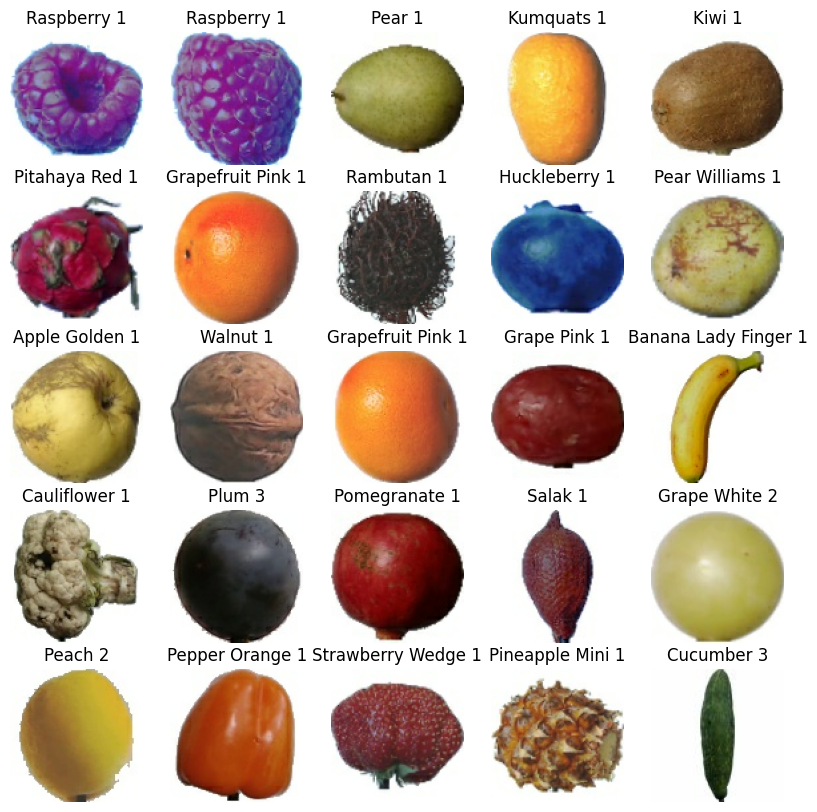

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1_conv[0][0]']      

: 

In [ ]:
# load dataset
train_dir = '../Data/raw/4/fruits-360_dataset_100x100/fruits-360/Training'
test_dir = '../Data/raw/4/fruits-360_dataset_100x100/fruits-360/Test'

# Load training dataset without preprocessing
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    batch_size=32,
    image_size=(100, 100),
    seed=123,
    shuffle=True,
)

# Load validation dataset without preprocessing
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='validation',
    batch_size=32,
    image_size=(100, 100),
    seed=42,
)


# Get the class names from the subdirectories in the training directory
class_names = sorted(os.listdir(train_dir))

# Print the class names and the number of classes
print("Class Names:", class_names)
num_classes = len(class_names)
print("Number of Classes:", num_classes)




# Function to display images from a dataset
def show_images(dataset, class_names):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):  # Take one batch from the dataset
        for i in range(25):  # Display 25 images
            ax = plt.subplot(5, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

# Show images from training dataset
show_images(train_ds, class_names)
plt.show()







# for faster training which takes less time and less memory for training
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)





# Augmentation for training dataset
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2)
])







# Using resNET model of transfer learning for training 
base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(100, 100, 3))


preprocess_input = tf.keras.applications.resnet.preprocess_input
base_model.trainable = False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(num_classes)



inputs = tf.keras.Input(shape=(100, 100, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)



optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
# Let's take a look at the base model architecture
base_model.summary()

In [ ]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(patience=3)
checkpoint = ModelCheckpoint("model.h5", save_best_only=True)

MODEL_NAME = "fruits_resnet50-augmented"
OUTPUT_CONFUSION_MATRICES_DIR = os.path.join('../output/confusion_matrices/', MODEL_NAME)
os.makedirs(OUTPUT_CONFUSION_MATRICES_DIR, exist_ok=True)
OUTPUT_EVALUATION_METRICS_DIR = os.path.join('../output/evaluation_metrics/', MODEL_NAME)
os.makedirs(OUTPUT_EVALUATION_METRICS_DIR, exist_ok=True)


# Train the model with early stopping
history = model.fit(
    train_ds,
    epochs=5,
    validation_data=val_ds,
    callbacks=[early_stopping, checkpoint]
)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


# Plot training history
plt.plot(history.history['loss'], label='Training Loss',marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()




# Evaluate Fast Model
print("Evaluating Fast Model...")

# Get true labels and predictions
Y_true = []
Y_pred = []

for images, labels in val_ds:
    Y_true.extend(labels.numpy())
    predictions = model.predict(images)
    Y_pred.extend(np.argmax(predictions, axis=1))

Y_true = np.array(Y_true)
Y_pred = np.array(Y_pred)

# Calculate evaluation accuracy
evaluation_metrics = model.evaluate(val_ds, verbose=1)
evaluation_loss = evaluation_metrics[0]
evaluation_accuracy = evaluation_metrics[1]
print(f"Validation Accuracy: {evaluation_accuracy*100:.2f}%")

# Calculate F1 Score, Precision, Recall
f1 = f1_score(Y_true, Y_pred, average='weighted')
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Classification Report
target_names = class_names  # Use the class names obtained earlier
print("Classification Report:")
print(classification_report(Y_true, Y_pred, target_names=target_names))

# Confusion Matrix with Percentages
cm = confusion_matrix(Y_true, Y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
cm_percentage = np.nan_to_num(cm_percentage)

# Prepare annotations with percentage symbol
annot_labels = np.empty_like(cm_percentage).astype(str)
nrows, ncols = cm_percentage.shape
for i in range(nrows):
    for j in range(ncols):
        annot_labels[i, j] = f'{cm_percentage[i, j]:.2f}%'

plt.figure(figsize=(145, 120))
sns.heatmap(cm_percentage, annot=annot_labels, fmt='', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix (Percentage) - Fast Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# Save confusion matrix
confusion_matrix_path = os.path.join(OUTPUT_CONFUSION_MATRICES_DIR, 'confusion_matrix_percentage.png')
plt.savefig(confusion_matrix_path)
plt.show()

# Save evaluation metrics to CSV
metrics_data = {
    'Metric': ['Validation Accuracy', 'Validation Loss', 'F1 Score', 'Precision', 'Recall'],
    'Value': [evaluation_accuracy, evaluation_loss, f1, precision, recall]
}
metrics_df = pd.DataFrame(metrics_data)
metrics_csv_path = os.path.join(OUTPUT_EVALUATION_METRICS_DIR, 'metrics.csv')
metrics_df.to_csv(metrics_csv_path, index=False)

# Save the final model
model.save('../models/model_fruits_resnet50-augmented.h5')

Epoch 1/5


2024-12-20 12:06:17.899007: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 323 of 1000
2024-12-20 12:06:27.904119: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 648 of 1000
2024-12-20 12:06:37.925893: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 978 of 1000
2024-12-20 12:06:38.577936: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


 256/1763 [===>..........................] - ETA: 2:09:15 - loss: 4.0502 - accuracy: 0.1626

# Model 2

In [4]:
# load dataset
train_dir = '../Data/raw/4/fruits-360_dataset_100x100/fruits-360/Training'
test_dir = '../Data/raw/4/fruits-360_dataset_100x100/fruits-360/Test'

# Load training dataset without preprocessing
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    batch_size=32,
    image_size=(100, 100),
    seed=123,
    shuffle=True,
)

# Load validation dataset without preprocessing
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='validation',
    batch_size=32,
    image_size=(100, 100),
    seed=42,
)


# Get the class names from the subdirectories in the training directory
class_names = sorted(os.listdir(train_dir))








# for faster training which takes less time and less memory for training
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)





# Augmentation for training dataset
data_augmentation = tf.keras.Sequential([
    # tf.keras.layers.RandomFlip('horizontal'),
    # tf.keras.layers.RandomRotation(0.2)
])







# Using resNET model of transfer learning for training 
base_model = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(100, 100, 3))


preprocess_input = tf.keras.applications.resnet.preprocess_input
base_model.trainable = False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(num_classes)



inputs = tf.keras.Input(shape=(100, 100, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)



optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
# Let's take a look at the base model architecture
base_model.summary()

NameError: name 'tf' is not defined

In [5]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(patience=3)
checkpoint = ModelCheckpoint("model.h5", save_best_only=True)

MODEL_NAME = "fruits_mobilenet"
OUTPUT_CONFUSION_MATRICES_DIR = os.path.join('../output/confusion_matrices/', MODEL_NAME)
os.makedirs(OUTPUT_CONFUSION_MATRICES_DIR, exist_ok=True)
OUTPUT_EVALUATION_METRICS_DIR = os.path.join('../output/evaluation_metrics/', MODEL_NAME)
os.makedirs(OUTPUT_EVALUATION_METRICS_DIR, exist_ok=True)


# Train the model with early stopping
history = model.fit(
    train_ds,
    epochs=5,
    validation_data=val_ds,
    callbacks=[early_stopping, checkpoint]
)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


# Plot training history
plt.plot(history.history['loss'], label='Training Loss',marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()




# Evaluate Fast Model
print("Evaluating Fast Model...")

# Get true labels and predictions
Y_true = []
Y_pred = []

for images, labels in val_ds:
    Y_true.extend(labels.numpy())
    predictions = model.predict(images)
    Y_pred.extend(np.argmax(predictions, axis=1))

Y_true = np.array(Y_true)
Y_pred = np.array(Y_pred)

# Calculate evaluation accuracy
evaluation_metrics = model.evaluate(val_ds, verbose=1)
evaluation_loss = evaluation_metrics[0]
evaluation_accuracy = evaluation_metrics[1]
print(f"Validation Accuracy: {evaluation_accuracy*100:.2f}%")

# Calculate F1 Score, Precision, Recall
f1 = f1_score(Y_true, Y_pred, average='weighted')
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Classification Report
target_names = class_names  # Use the class names obtained earlier
print("Classification Report:")
print(classification_report(Y_true, Y_pred, target_names=target_names))

# Confusion Matrix with Percentages
cm = confusion_matrix(Y_true, Y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
cm_percentage = np.nan_to_num(cm_percentage)

# Prepare annotations with percentage symbol
annot_labels = np.empty_like(cm_percentage).astype(str)
nrows, ncols = cm_percentage.shape
for i in range(nrows):
    for j in range(ncols):
        annot_labels[i, j] = f'{cm_percentage[i, j]:.2f}%'

plt.figure(figsize=(145, 120))
sns.heatmap(cm_percentage, annot=annot_labels, fmt='', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix (Percentage) - Fast Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# Save confusion matrix
confusion_matrix_path = os.path.join(OUTPUT_CONFUSION_MATRICES_DIR, 'confusion_matrix_percentage.png')
plt.savefig(confusion_matrix_path)
plt.show()

# Save evaluation metrics to CSV
metrics_data = {
    'Metric': ['Validation Accuracy', 'Validation Loss', 'F1 Score', 'Precision', 'Recall'],
    'Value': [evaluation_accuracy, evaluation_loss, f1, precision, recall]
}
metrics_df = pd.DataFrame(metrics_data)
metrics_csv_path = os.path.join(OUTPUT_EVALUATION_METRICS_DIR, 'metrics.csv')
metrics_df.to_csv(metrics_csv_path, index=False)

# Save the final model
model.save('../models/model_fruits_mobilenet.h5')

NameError: name 'EarlyStopping' is not defined

In [6]:
# load dataset
train_dir = '../Data/raw/4/fruits-360_dataset_100x100/fruits-360/Training'
test_dir = '../Data/raw/4/fruits-360_dataset_100x100/fruits-360/Test'

# Load training dataset without preprocessing
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    batch_size=32,
    image_size=(100, 100),
    seed=123,
    shuffle=True,
)

# Load validation dataset without preprocessing
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='validation',
    batch_size=32,
    image_size=(100, 100),
    seed=42,
)


# Get the class names from the subdirectories in the training directory
class_names = sorted(os.listdir(train_dir))








# for faster training which takes less time and less memory for training
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)





# Augmentation for training dataset
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2)
])







# Using resNET model of transfer learning for training 
base_model = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(100, 100, 3))


preprocess_input = tf.keras.applications.resnet.preprocess_input
base_model.trainable = False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(num_classes)



inputs = tf.keras.Input(shape=(100, 100, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)



optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
# Let's take a look at the base model architecture
base_model.summary()

NameError: name 'tf' is not defined

In [7]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(patience=3)
checkpoint = ModelCheckpoint("model.h5", save_best_only=True)

MODEL_NAME = "fruits_mobilenet-augmented"
OUTPUT_CONFUSION_MATRICES_DIR = os.path.join('../output/confusion_matrices/', MODEL_NAME)
os.makedirs(OUTPUT_CONFUSION_MATRICES_DIR, exist_ok=True)
OUTPUT_EVALUATION_METRICS_DIR = os.path.join('../output/evaluation_metrics/', MODEL_NAME)
os.makedirs(OUTPUT_EVALUATION_METRICS_DIR, exist_ok=True)


# Train the model with early stopping
history = model.fit(
    train_ds,
    epochs=5,
    validation_data=val_ds,
    callbacks=[early_stopping, checkpoint]
)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


# Plot training history
plt.plot(history.history['loss'], label='Training Loss',marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss',marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()




# Evaluate Fast Model
print("Evaluating Fast Model...")

# Get true labels and predictions
Y_true = []
Y_pred = []

for images, labels in val_ds:
    Y_true.extend(labels.numpy())
    predictions = model.predict(images)
    Y_pred.extend(np.argmax(predictions, axis=1))

Y_true = np.array(Y_true)
Y_pred = np.array(Y_pred)

# Calculate evaluation accuracy
evaluation_metrics = model.evaluate(val_ds, verbose=1)
evaluation_loss = evaluation_metrics[0]
evaluation_accuracy = evaluation_metrics[1]
print(f"Validation Accuracy: {evaluation_accuracy*100:.2f}%")

# Calculate F1 Score, Precision, Recall
f1 = f1_score(Y_true, Y_pred, average='weighted')
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Classification Report
target_names = class_names  # Use the class names obtained earlier
print("Classification Report:")
print(classification_report(Y_true, Y_pred, target_names=target_names))

# Confusion Matrix with Percentages
cm = confusion_matrix(Y_true, Y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
cm_percentage = np.nan_to_num(cm_percentage)

# Prepare annotations with percentage symbol
annot_labels = np.empty_like(cm_percentage).astype(str)
nrows, ncols = cm_percentage.shape
for i in range(nrows):
    for j in range(ncols):
        annot_labels[i, j] = f'{cm_percentage[i, j]:.2f}%'

plt.figure(figsize=(145, 120))
sns.heatmap(cm_percentage, annot=annot_labels, fmt='', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix (Percentage) - Fast Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# Save confusion matrix
confusion_matrix_path = os.path.join(OUTPUT_CONFUSION_MATRICES_DIR, 'confusion_matrix_percentage.png')
plt.savefig(confusion_matrix_path)
plt.show()

# Save evaluation metrics to CSV
metrics_data = {
    'Metric': ['Validation Accuracy', 'Validation Loss', 'F1 Score', 'Precision', 'Recall'],
    'Value': [evaluation_accuracy, evaluation_loss, f1, precision, recall]
}
metrics_df = pd.DataFrame(metrics_data)
metrics_csv_path = os.path.join(OUTPUT_EVALUATION_METRICS_DIR, 'metrics.csv')
metrics_df.to_csv(metrics_csv_path, index=False)

# Save the final model
model.save('../models/model_fruits_mobilenet-augmented.h5')

NameError: name 'EarlyStopping' is not defined